In [2]:
#  import sys
#  !{sys.executable} -m pip install pandas
#  !{sys.executable} -m pip install numpy
#  !{sys.executable} -m pip install matplotlib
#  !{sys.executable} -m pip install sklearn
#  !{sys.executable} -m pip install scipy
#  !{sys.executable} -m pip install kneed

In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.cluster import KMeans

In [5]:
dataset = pd.read_csv(r"E:\Fakultet\Master\Masinsko ucenje\ML2---Clusterization\ML2_Clusterization\MoviesOnStreamingPlatforms_updated.csv")
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


# Prečišćavanje dataseta

## brisanje nepotpunih vrsta

In [6]:
dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [7]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


## konverzija atributa Year u kategoričke vrednosti. 

In [8]:
dataset.Year=pd.to_numeric(dataset.Year)
for i in range(dataset.shape[0]):
    if dataset.Year[i]<1990:
        dataset.Year[i]=0
    else:
        dataset.Year[i]=1

<ipython-input-8-eba6b6ab8a2a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Year[i]=1
<ipython-input-8-eba6b6ab8a2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Year[i]=0


In [9]:
dataset.head()


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,1,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [10]:
runtime_mean = dataset.Runtime.mean()
dataset['Runtime']=pd.to_numeric(dataset['Runtime'],errors='coerce')
for i in range(dataset.shape[0]):
    if dataset.Runtime[i]<=runtime_mean:
        dataset.Runtime[i]=0
    else:
        dataset.Runtime[i]=1

<ipython-input-10-16c93985c5e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Runtime[i]=1
<ipython-input-10-16c93985c5e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Runtime[i]=0


In [11]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,1,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",1.0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,1.0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,1.0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,1.0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,1.0


In [14]:
def clean(column_name):
    """This function takes a column from the dataframe and splits two elements
       if they are separated by a comma.
       For ex. in Actors column there might be values such as Christian Bale, Morgan Freeman.
       This will separate these two actors and store them individually in a list."""
    name = set()
    for name_string in dataset[column_name]:
        name.update(name_string.split(','))
    name = sorted(name)
    return name


def top(column_name):
    """This function takes its input as name of the column and returns a sorted list of the
       elements which occur very frequently in that column in descending order."""

    name = clean(column_name)
    dummy_name = pd.DataFrame()
    for n in name:
        dummy_name[n] = [int(n in nm.split(',')) for nm in dataset[column_name]]

    namelist = [n for n in name]
    nlt = dummy_name[namelist].sum()
    nlt = nlt.sort_values(axis=0, ascending=False)
    return nlt.index


def plot_column(column_name, n_elem_display=0):
    """ This function is used to plot a bar graph of a column of the dataframe.
        It takes its argument as name of column and number of elements to display and
        return a bar graph of the user defined number of top elements which occur
        frequently in that column."""

    name = clean(column_name)
    dummy_name = pd.DataFrame()
    for n in name:
        dummy_name[n] = [int(n in nm.split(',')) for nm in dataset[column_name]]

    namelist = [n for n in name]
    nlt = dummy_name[namelist].sum()
    nlt = nlt.sort_values(axis=0, ascending=False)
    if n_elem_display != 0:
        return nlt[:n_elem_display].plot(kind="bar", figsize=(10, 10))
    else:
        return nlt[:].plot(kind="bar", figsize=(10, 5))

<AxesSubplot:>

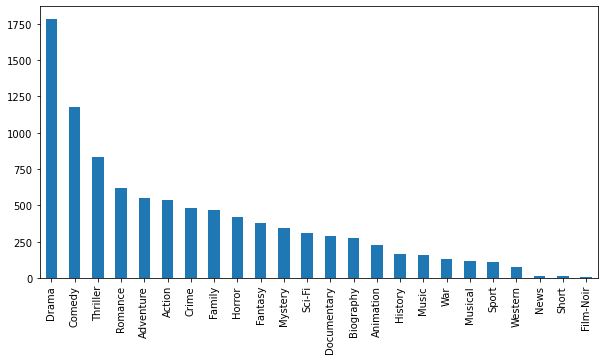

In [15]:
plot_column('Genres')

In [17]:
genres=clean('Genres')
for genre in genres:
    dataset["Genre:"+genre] = [int(genre in g.split(',')) for g in dataset.Genres]

In [18]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Genre:Musical,Genre:Mystery,Genre:News,Genre:Romance,Genre:Sci-Fi,Genre:Short,Genre:Sport,Genre:Thriller,Genre:War,Genre:Western
0,0,1,Inception,1,13+,8.8,87%,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

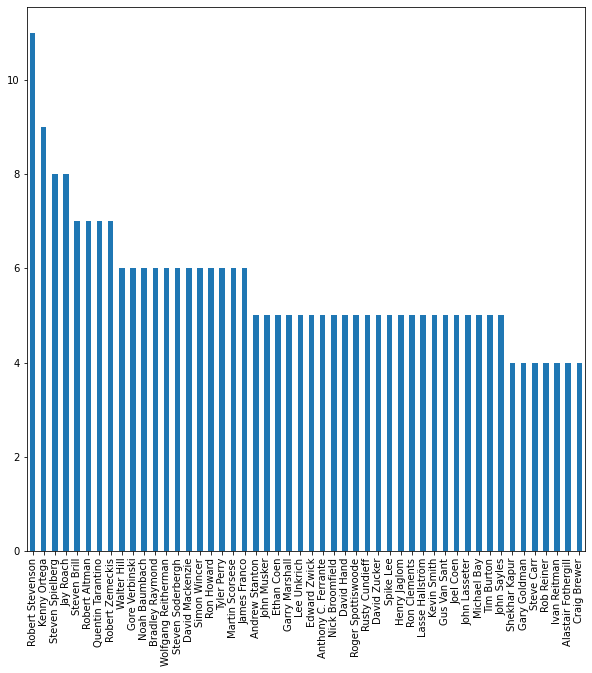

In [22]:
plot_column('Directors',50)

In [24]:
directors=top('Directors')
    
for director in directors[:50]:
    dataset["Director:"+director] = [int(director in d.split(',')) for d in dataset.Directors]

In [25]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Director:Michael Bay,Director:Tim Burton,Director:John Sayles,Director:Shekhar Kapur,Director:Gary Goldman,Director:Steve Carr,Director:Rob Reiner,Director:Ivan Reitman,Director:Alastair Fothergill,Director:Craig Brewer
0,0,1,Inception,1,13+,8.8,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

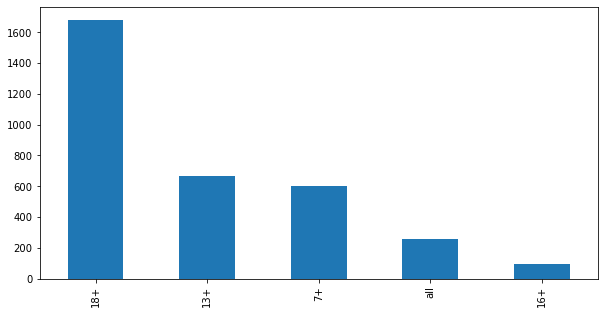

In [26]:
plot_column('Age')

In [36]:
ages=top('Age')
dataset['Age:18+']=np.nan
dataset['Age:13+']=np.nan
dataset['Age:7+']=np.nan
dataset['Age:16+']=np.nan
dataset['Age:all']=np.nan

for i in range(dataset.shape[0]):
    if dataset.Age[i] == '18+':
        dataset['Age:18+'][i] = 1
        dataset['Age:13+'][i] = 0
        dataset['Age:7+'][i] = 0
        dataset['Age:16+'][i] = 0
        dataset['Age:all'][i] = 0
        
    if dataset.Age[i] == '13+':
        dataset['Age:18+'][i] = 0
        dataset['Age:13+'][i] = 1
        dataset['Age:7+'][i] = 0
        dataset['Age:16+'][i] = 0
        dataset['Age:all'][i] = 0
        
    if dataset.Age[i] == '7+':
        dataset['Age:18+'][i] = 0
        dataset['Age:13+'][i] = 0
        dataset['Age:7+'][i] = 1
        dataset['Age:16+'][i] = 0
        dataset['Age:all'][i] = 0
        
    if dataset.Age[i] == '16+':
        dataset['Age:18+'][i] = 0
        dataset['Age:13+'][i] = 0
        dataset['Age:7+'][i] = 0
        dataset['Age:16+'][i] = 1
        dataset['Age:all'][i] = 0
        
    if dataset.Age[i] == 'all':
        dataset['Age:18+'][i] = 0
        dataset['Age:13+'][i] = 0
        dataset['Age:7+'][i] = 0
        dataset['Age:16+'][i] = 0
        dataset['Age:all'][i] = 1
dataset.head()

<ipython-input-36-6d9d52166785>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age:18+'][i] = 0
<ipython-input-36-6d9d52166785>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age:13+'][i] = 1
<ipython-input-36-6d9d52166785>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age:7+'][i] = 0
<ipython-input-36-6d9d52166785>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Director:Steve Carr,Director:Rob Reiner,Director:Ivan Reitman,Director:Alastair Fothergill,Director:Craig Brewer,Age:18+,Age:13+,Age:7+,Age:16+,Age:all
0,0,1,Inception,1,13+,8.8,87%,1,0,0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

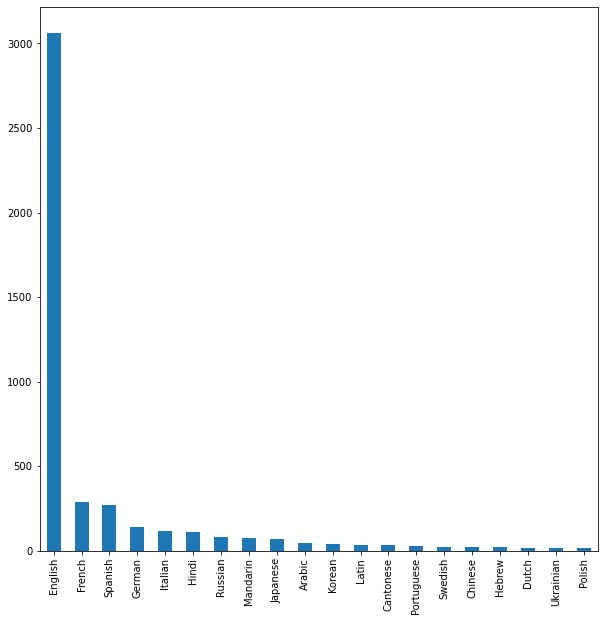

In [39]:
plot_column('Language',20)

In [42]:
languages=top('Language')
    
for language in languages[:20]:
    dataset["Language:"+language] = [int(language in d.split(',')) for d in dataset.Language]
    
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Language:Korean,Language:Latin,Language:Cantonese,Language:Portuguese,Language:Swedish,Language:Chinese,Language:Hebrew,Language:Dutch,Language:Ukrainian,Language:Polish
0,0,1,Inception,1,13+,8.8,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

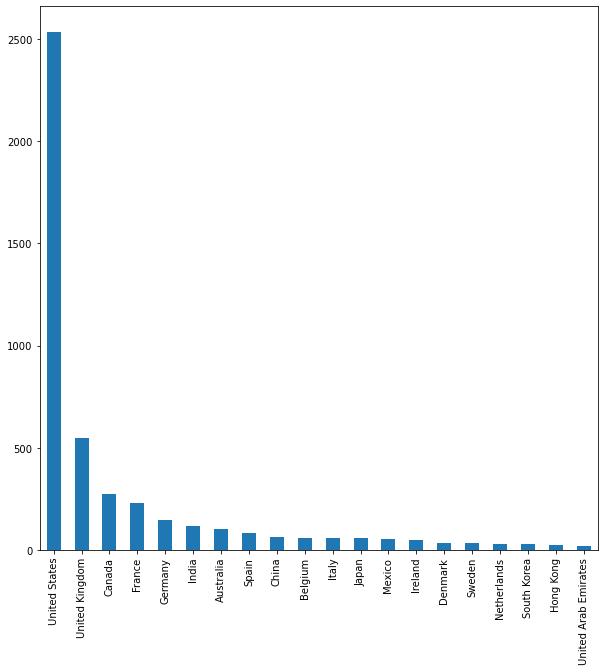

In [44]:
plot_column('Country',20)

In [45]:
countries=top('Country')
    
for country in countries[:20]:
    dataset["Country:"+country] = [int(country in d.split(',')) for d in dataset.Country]
    
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Country:Italy,Country:Japan,Country:Mexico,Country:Ireland,Country:Denmark,Country:Sweden,Country:Netherlands,Country:South Korea,Country:Hong Kong,Country:United Arab Emirates
0,0,1,Inception,1,13+,8.8,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,The Matrix,1,18+,8.7,87%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,Back to the Future,0,7+,8.5,96%,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [46]:
dataset.to_csv('modified_dataset.csv')

In [54]:
# del dataset['Title']
# del dataset['Age']
# del dataset['Directors']
# del dataset['Genres']
# del dataset['Country']
# del dataset['Language']
# del dataset['Rotten Tomatoes']
dataset.head()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime,...,Country:Italy,Country:Japan,Country:Mexico,Country:Ireland,Country:Denmark,Country:Sweden,Country:Netherlands,Country:South Korea,Country:Hong Kong,Country:United Arab Emirates
0,0,1,1,8.8,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,1,8.7,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,1,8.5,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,0,8.5,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,0,8.8,1,0,1,0,0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [55]:
dataset.to_csv('modified_dataset1.csv')

In [56]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(dataset)

KMeans(init='random', n_clusters=5, random_state=42)

In [57]:
labels = kmeans.labels_
clusters = kmeans.cluster_centers_
# print("----Labels:----")
# print(labels)
# print("----Cluters:----")
# print(clusters)

In [58]:
#elbow algorithm
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    distortions.append(kmeanModel.inertia_)

kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
num_clusters = kl.elbow
print(num_clusters)

3


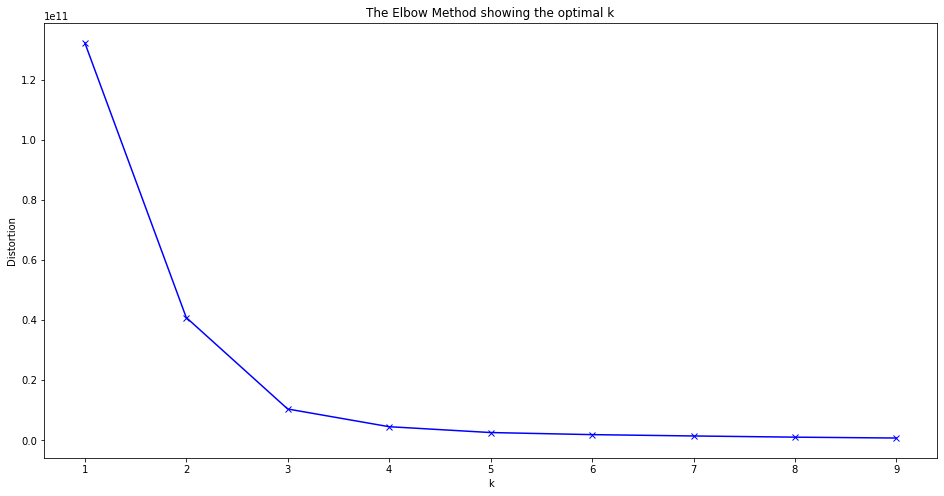

In [59]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [60]:
#silhouette algorithm
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
K = range(2,11)
for k in K:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(dataset)
    score = silhouette_score(dataset, kmeans.labels_)
    silhouette_coefficients.append(score)

num_clusters = silhouette_coefficients.index(max(silhouette_coefficients)) + 2
print(num_clusters)

2


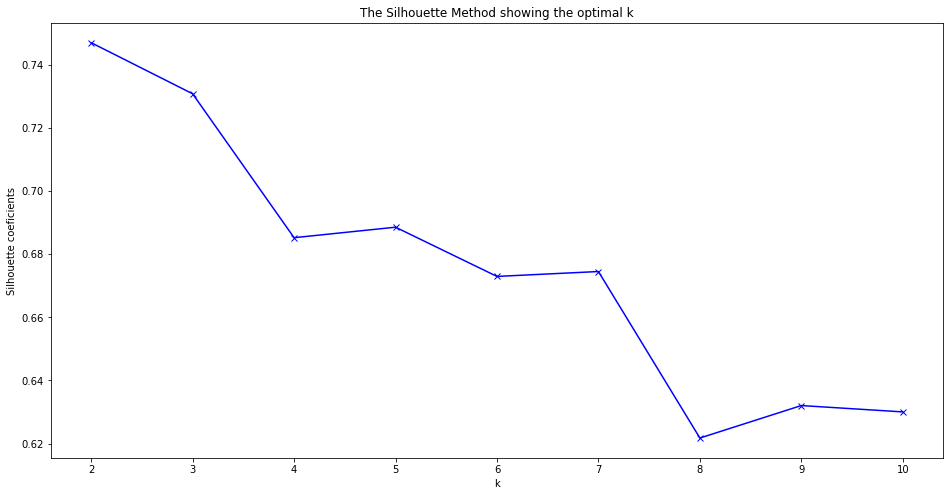

In [61]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouette_coefficients, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette coeficients')
plt.title('The Silhouette Method showing the optimal k')
plt.show()